<a href="https://colab.research.google.com/github/AishwaryaVelumani/Python-IP-ML/blob/master/Face_Detection_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py
#download util files

--2020-08-23 03:51:53--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.09s   

2020-08-23 03:51:54 (9.45 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2020-08-23 03:51:57--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)

In [2]:
import cv2
import common #some useful opencv functions
import numpy as np
from google.colab import files

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pylab # allows to control figure size
pylab.rcParams['figure.figsize']=(10.0,8.0) # controls figure size in the notebook

In [4]:
uploaded= files.upload()

Saving smis friends 2.jpeg to smis friends 2.jpeg


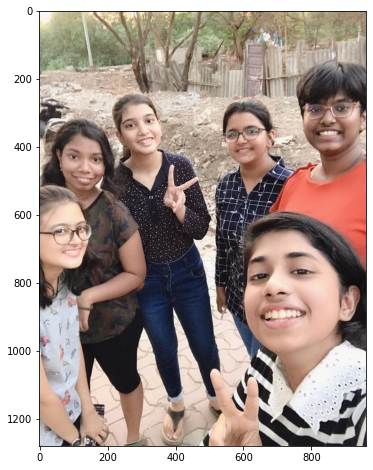

In [5]:
org_img= cv2.imread('smis friends 2.jpeg')
gray_img= cv2.cvtColor(org_img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(org_img,cv2.COLOR_BGR2RGB))
#opencv opens image in bgr format. To be able to see the image's true colors, we need to convert it rgb format

# Face Detection

In [10]:
test_img= cv2.imread('smis friends 2.jpeg')
face_cascade= cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [11]:
faces= face_cascade.detectMultiScale(gray_img,scaleFactor=1.2,minNeighbors=5)

In [12]:
print('No. of faces found: ',len(faces))

No. of faces found:  6


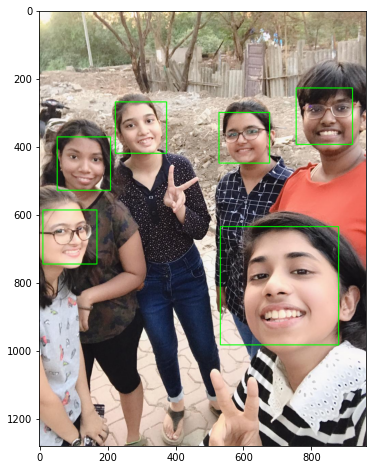

In [13]:
for (x,y,w,h) in faces:
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))

# Smile Detection

In [15]:
test_img= cv2.imread('smis friends 2.jpeg')
smile_cascade= cv2.CascadeClassifier('haarcascade_smile.xml')

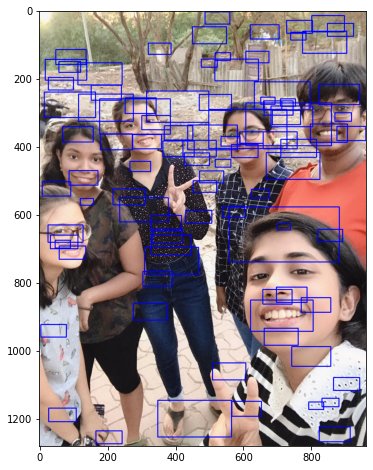

In [16]:
smiles= smile_cascade.detectMultiScale(gray_img,scaleFactor=1.2,minNeighbors=5)
for (x,y,w,h) in smiles:
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))

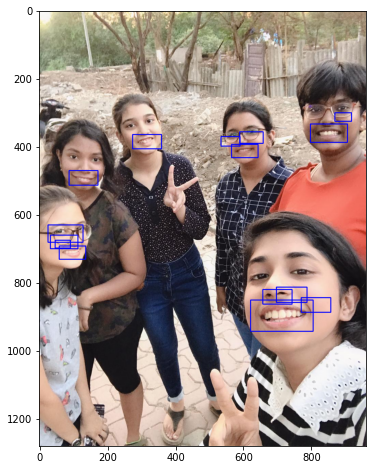

In [25]:
test_img= cv2.imread('smis friends 2.jpeg')
#c_smile=len(faces)
#smile_face= [0] * len
for (x,y,w,h) in faces:
    for (xs,ys,ws,hs) in smiles:
        if( (x<=xs) and (y<=ys) and (x+w>=xs+ws) and (y+h>=ys+hs) ):# if the smile box is inside the face box
            cv2.rectangle(test_img,(xs,ys),(xs+ws,ys+hs),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))

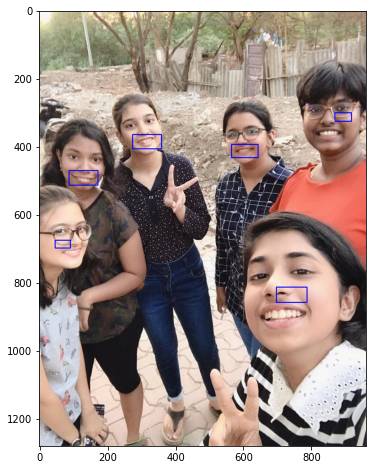

In [26]:
test_img= cv2.imread('smis friends 2.jpeg')
for (x,y,w,h) in faces:
    for (xs,ys,ws,hs) in smiles:
        if( (x<=xs) and (y<=ys) and (x+w>=xs+ws) and (y+h>=ys+hs) ):# if the smile box is inside the face box
            cv2.rectangle(test_img,(xs,ys),(xs+ws,ys+hs),(255,0,0),2)
            break #1 smile per face
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))

# Eye Detection

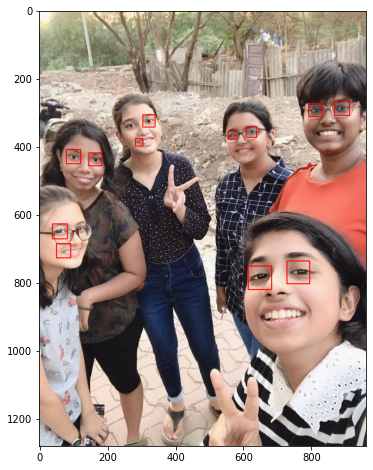

In [29]:
test_img= cv2.imread('smis friends 2.jpeg')
eye_cascade= cv2.CascadeClassifier('haarcascade_eye.xml')
eyes= eye_cascade.detectMultiScale(gray_img,scaleFactor=1.2,minNeighbors=5)
c_eye=2
for (x,y,w,h) in faces:
    c_eye=2
    for (xe,ye,we,he) in eyes:
        if ( (x<=xe) and (y<=ye) and (x+w>=xe+we) and (y+h>=ye+he) and c_eye>0 ):
            cv2.rectangle(test_img,(xe,ye),(xe+we,ye+he),(0,0,255),2)
            c_eye-=1
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))

# Putting all together

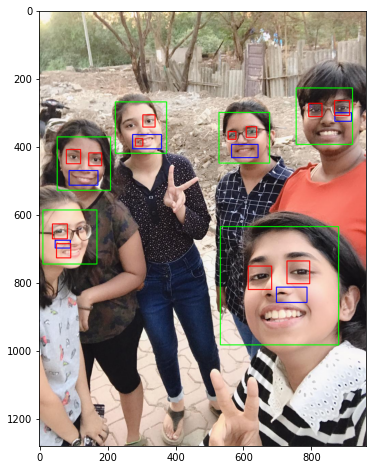

In [30]:
test_img= cv2.imread('smis friends 2.jpeg')
for (x,y,w,h) in faces:
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(0,255,0),2)
    for (xs,ys,ws,hs) in smiles:
        if( (x<=xs) and (y<=ys) and (x+w>=xs+ws) and (y+h>=ys+hs) ):# if the smile box is inside the face box
            cv2.rectangle(test_img,(xs,ys),(xs+ws,ys+hs),(255,0,0),2)
            break #1 smile per face
    c_eye=2
    for (xe,ye,we,he) in eyes:
        if ( (x<=xe) and (y<=ye) and (x+w>=xe+we) and (y+h>=ye+he) and c_eye>0 ):
            cv2.rectangle(test_img,(xe,ye),(xe+we,ye+he),(0,0,255),2)
            c_eye-=1 
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))